## **1. Importar todas las librerías necesarias.**

In [2]:
import random
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## **2. Inicializar algunas variables que después modificaremos.**

In [4]:
hostnames = []
dataset = []
df = None

## **3. Crear una función para generar los hostnames en base a unas reglas**

In [6]:
def set_hostnames (number_of_hosts: int) -> None:
    operating_system = ['L']*40 + ['S']*30 + ['A']*20 + ['H']*10  # 40% Linux | 30% Solaris | 20% AIX | 10% HP-UX
    environment = ['D']*10 + ['I']*10 + ['T']*25 + ['S']*25 + ['P']*30  #  10% Development | 10% Integration | 25% Testing | 25% Staging | 30% Production
    country = ['NOR']*6 + ['FRA']*9 + ['ITA']*16 + ['ESP']*16 + ['DEU']*23 + ['IRL']*30  # 6% Norway | 9% France | 16% Italy | 16% Spain | 23% Germany | 30% Ireland 
    alpha_control = []

    for i in range(number_of_hosts):
        hostname = random.choice(operating_system) + random.choice(environment) + random.choice(country)
        alpha_control.append(hostname)
        hostname += str(alpha_control.count(hostname)).zfill(3)
        hostnames.append(hostname)

## **4. Crear una función para obtener el nombre del SO.**

In [8]:
def get_os (hostname: str) -> str:
    if hostname.startswith('L'):
        return 'Linux'
    elif hostname.startswith('S'):
        return 'Solaris'
    elif hostname.startswith('A'):
        return 'AIX'
    elif hostname.startswith('H'):
        return 'HP-UX'
    else:
        return 'Unknow'

## **5. Crear una función para obtener el nombre del entorno.**

In [10]:
def get_environment (hostname: str) -> str:
    environment_hostname = hostname[1]
    
    if environment_hostname == 'D':
        return 'Development'
    elif environment_hostname == 'I':
        return 'Integration'
    elif environment_hostname == 'T':
        return 'Testing'
    elif environment_hostname == 'S':
        return 'Staging'
    elif environment_hostname == 'P':
        return 'Production'
    else:
        return 'Unknow'

## **6. Crear una función para obtener el nombre del país.**

In [12]:
def get_country (hostname: str) -> str:
    country_hostname = hostname[2:5]
    
    if country_hostname == 'NOR':
        return 'Norway'
    elif country_hostname == 'FRA':
        return 'France'
    elif country_hostname == 'ITA':
        return 'Italy'
    elif country_hostname == 'ESP':
        return 'Spain'
    elif country_hostname == 'DEU':
        return 'Germany'
    elif country_hostname == 'IRL':
        return 'Ireland'
    else:
        return 'Unknow'

## **7. Crear una función para generar el DataFrame.**

In [14]:
def set_dataframe (count: int) -> None:
    global df

    set_hostnames (count)

    for hostname in hostnames:
        dataset.append({
            'hostname': hostname,
            'os': get_os(hostname),
            'environment': get_environment(hostname),
            'country': get_country(hostname),
            'node': int(hostname[-3:])
        })
    df = pd.DataFrame(dataset)

## **8. Crear el DataFrame.**

In [16]:
set_dataframe (1500)
df

,hostname,os,environment,country,node
0,HTFRA001,HP-UX,Testing,France,1
1,LPFRA001,Linux,Production,France,1
2,LIIRL001,Linux,Integration,Ireland,1
3,HDNOR001,HP-UX,Development,Norway,1
4,LDDEU001,Linux,Development,Germany,1
...,...,...,...,...,...
1495,LTIRL040,Linux,Testing,Ireland,40
1496,LSFRA017,Linux,Staging,France,17
1497,HPFRA005,HP-UX,Production,France,5
1498,SDIRL010,Solaris,Development,Ireland,10


## **9. Guardar el DataFrame generado en un fichero CSV.**

In [18]:
df.to_csv(
    'hosts.csv',
    header=True,
    index=False
)

df_hosts = pd.read_csv('hosts.csv')
df_hosts

,hostname,os,environment,country,node
0,HTFRA001,HP-UX,Testing,France,1
1,LPFRA001,Linux,Production,France,1
2,LIIRL001,Linux,Integration,Ireland,1
3,HDNOR001,HP-UX,Development,Norway,1
4,LDDEU001,Linux,Development,Germany,1
...,...,...,...,...,...
1495,LTIRL040,Linux,Testing,Ireland,40
1496,LSFRA017,Linux,Staging,France,17
1497,HPFRA005,HP-UX,Production,France,5
1498,SDIRL010,Solaris,Development,Ireland,10


## **10. Generar un único gráfico, agrupando para cada país (country) los  entornos (environment).**

<Axes: xlabel='country'>

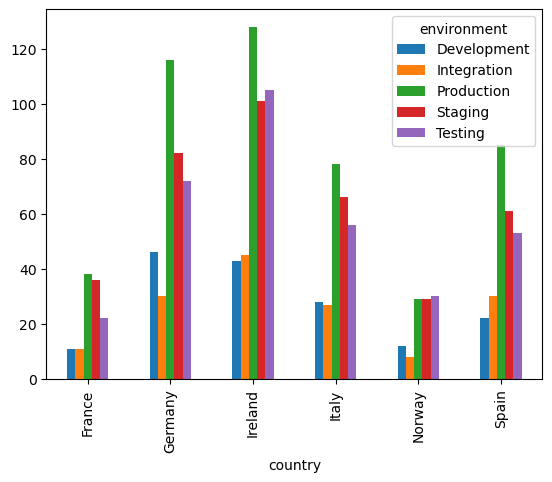

In [20]:
graphic = df.groupby(['country', 'environment']).size()
graphic.unstack().plot(kind='bar')

## **11. Crear una figura con 4 gráficos en una malla de 2 filas y 2 columnas.**

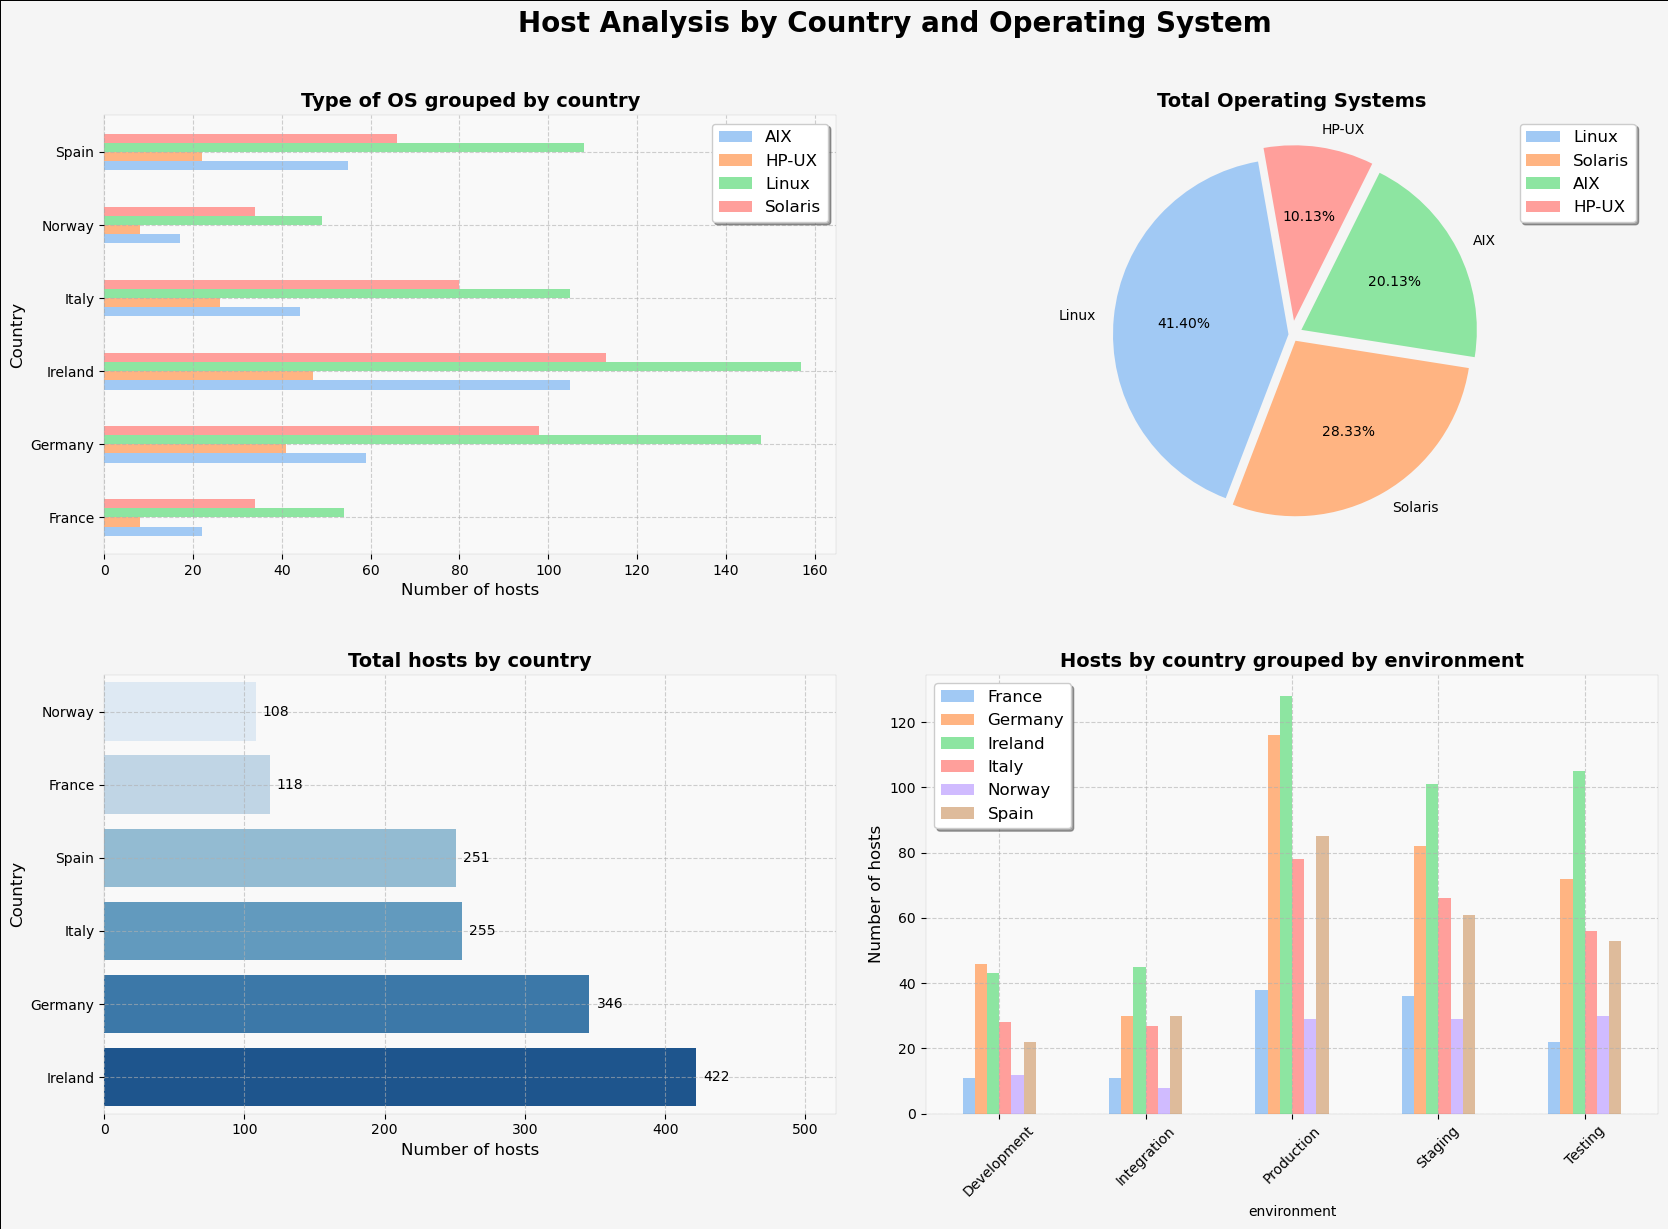

In [22]:
pastel_palette = sns.color_palette("pastel", n_colors=6)

fig, axes = plt.subplots(2, 2, figsize=(18, 12))
fig.suptitle('Host Analysis by Country and Operating System', fontsize=20, fontweight='bold', y=1.02)
fig.patch.set_facecolor('#f5f5f5')
for ax in axes.flatten():
    ax.set_facecolor('#f9f9f9')
    for spine in ax.spines.values():
        spine.set_edgecolor('black')
        spine.set_linewidth(0.05)

# Gráfico 1: Tipo de SO agrupado por país
df.groupby(['country', 'os']).size().unstack().plot(kind='barh', ax=axes[0, 0], color = pastel_palette)
axes[0, 0].set_title('Type of OS grouped by country',fontsize=14, fontweight='bold')
axes[0, 0].set_ylabel('Country', fontsize=12)
axes[0, 0].set_xlabel('Number of hosts', fontsize=12)
axes[0, 0].grid(True, linestyle='--', alpha=0.6)
axes[0, 0].legend(fontsize = 12, shadow = True)

# Gráfico 2: Pie chart para el total de sistemas operativos
os_counts = df['os'].value_counts()
desfase = (0.02, 0.04, 0.06, 0.08)
os_counts.plot(kind='pie', autopct='%1.2f%%', ax=axes[0, 1], startangle=100, legend=True, explode = desfase, colors = pastel_palette)
axes[0, 1].set_ylabel('')
axes[0, 1].set_title('Total Operating Systems',fontsize=14, fontweight='bold')
axes[0, 1].legend(fontsize=12, loc='upper left', bbox_to_anchor=(1, 1), shadow=True, fancybox=True)

# Gráfico 3: Total de hosts por país
seq_palette = sns.color_palette("Blues", 6)
country_counts = df['country'].value_counts().sort_values()
max_hosts = country_counts.max() + 100
sns.barplot(x=country_counts.values, y=country_counts.index, hue=country_counts.index, palette = seq_palette, legend=False, ax=axes[1, 0])
for index, value in enumerate(country_counts.values):
    axes[1, 0].text(value + 5, index, str(value), va='center', fontsize=10)
axes[1, 0].set_xlim(0, max_hosts)
axes[1, 0].set_xlabel('Number of hosts', fontsize=12)
axes[1, 0].set_ylabel('Country', fontsize=12)
axes[1, 0].set_title('Total hosts by country', fontsize=14, fontweight='bold')
axes[1, 0].grid(True, linestyle='--', alpha=0.6)

# Gráfico 4: Hosts por país agrupados por entorno
df.groupby(['country', 'environment']).size().unstack(0).plot(kind='bar', ax=axes[1, 1], color=pastel_palette)
axes[1, 1].set_ylabel('Number of hosts', fontsize=12)
axes[1, 1].set_title('Hosts by country grouped by environment', fontsize=14, fontweight='bold')
axes[1, 1].tick_params(axis='x', rotation=45)
axes[1, 1].grid(True, linestyle='--', alpha=0.6)
axes[1, 1].legend(fontsize = 12, shadow = True)

fig.subplots_adjust(hspace=10, wspace=15)
fig.patch.set_edgecolor('black')
fig.patch.set_linewidth(0.5)

fig.tight_layout()
plt.show()